# Spivavtor GEC changes analysis

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt

### Auxiliary methods

In [2]:
def analyze_changes(file_path: str, original_col: str, modified_col: str) -> dict:
    def is_first_letter_change(original, modified):
        return original != modified and original[1:] == modified[1:]

    def is_only_final_punctuation_change(original, modified):
        if original == modified:
            return False
        return original == modified.rstrip(string.punctuation)

    df = pd.read_csv(file_path)

    counts = {"Unchanged": 0, "First Letter": 0, "Punctuation": 0, "Other": 0}

    for _, row in df.iterrows():
        original = str(row[original_col])
        modified = str(row[modified_col])

        if original == modified:
            counts["Unchanged"] += 1
        elif is_first_letter_change(original, modified):
            counts["First Letter"] += 1
        elif is_only_final_punctuation_change(original, modified):
            counts["Punctuation"] += 1
        else:
            counts["Other"] += 1

    return counts

In [3]:


def plot_change_counts(counts):
    labels = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728'])

    # plt.title('Types of Changes Between Original and Modified Strings', fontsize=14)
    plt.ylabel('Count')
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

## ETHICS

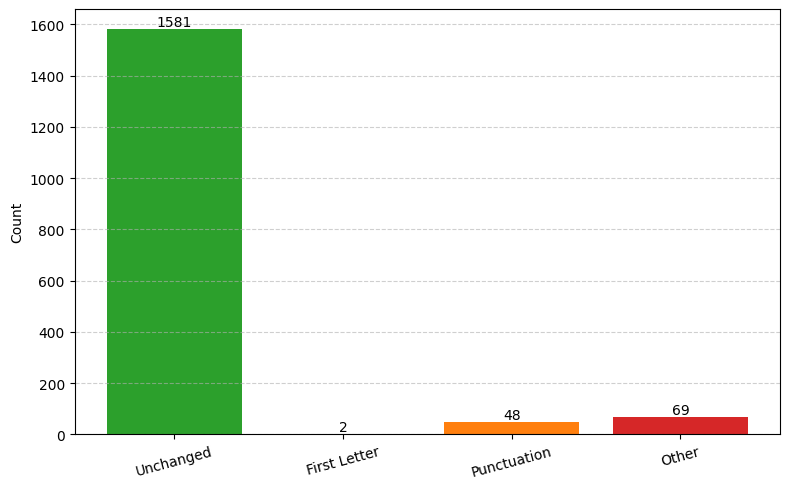

In [4]:
ethics_result = analyze_changes("../data/ethics/ethics_commonsense_gec.csv", "input_ukr", "input_ukr_spivavtor")
plot_change_counts(ethics_result)

## Social Chemistry 101

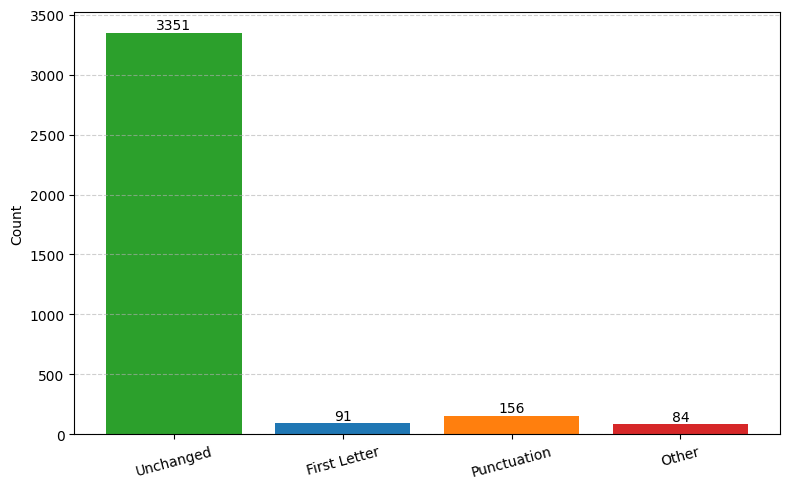

In [6]:
sc_101_results = analyze_changes("../data/social-chem-101/social-chem-101_gec.csv", "action_ukr", "action_ukr_spivavtor")
plot_change_counts(sc_101_results)